In [19]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
# IMPORT DATASET
dataset = pd.read_csv("Dataset/BostonHousing.csv")
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
x = dataset.loc[:,column_sels]
y = dataset['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

In [41]:
x = x.values
y = y.values

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=32)

In [45]:
model = keras.Sequential([
keras.layers.Dense(130, activation=tf.nn.relu, input_shape=[8]),
keras.layers.Dense(230, activation=tf.nn.relu),
keras.layers.Dense(131, activation=tf.nn.relu),
keras.layers.Dense(321, activation=tf.nn.relu),
keras.layers.Dense(14, activation=tf.nn.relu),
keras.layers.Dense(1, activation=tf.nn.relu)
])
model.compile(optimizer='adam',loss='mean_absolute_error')
save_best_val_loss = keras.callbacks.ModelCheckpoint('best_model_val_loss.h5',save_best_only=True,monitor='val_loss',mode='min')
save_best_loss = keras.callbacks.ModelCheckpoint('best_model_loss.h5',save_best_only=True,monitor='loss',mode='min')

In [46]:
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs = 100,batch_size = 400,shuffle = True,callbacks = [save_best_val_loss, save_best_loss])

Train on 430 samples, validate on 76 samples
Epoch 1/100
430/430 [==============================] - 0s 1ms/step - loss: 22.4220 - val_loss: 22.9528
Epoch 2/100
430/430 [==============================] - 0s 22us/step - loss: 22.2810 - val_loss: 22.7640
Epoch 3/100
430/430 [==============================] - 0s 24us/step - loss: 22.0886 - val_loss: 22.4795
Epoch 4/100
430/430 [==============================] - 0s 26us/step - loss: 21.7975 - val_loss: 22.0574
Epoch 5/100
430/430 [==============================] - 0s 23us/step - loss: 21.3682 - val_loss: 21.4428
Epoch 6/100
430/430 [==============================] - 0s 21us/step - loss: 20.7370 - val_loss: 20.5443
Epoch 7/100
430/430 [==============================] - 0s 19us/step - loss: 19.8189 - val_loss: 19.2291
Epoch 8/100
430/430 [==============================] - 0s 19us/step - loss: 18.4779 - val_loss: 17.3313
Epoch 9/100
430/430 [==============================] - 0s 19us/step - loss: 16.5981 - val_loss: 14.7684
Epoch 10/100
430/430

Epoch 80/100
430/430 [==============================] - 0s 26us/step - loss: 2.7509 - val_loss: 3.5529
Epoch 81/100
430/430 [==============================] - 0s 22us/step - loss: 3.0616 - val_loss: 3.2627
Epoch 82/100
430/430 [==============================] - 0s 22us/step - loss: 2.8027 - val_loss: 3.1444
Epoch 83/100
430/430 [==============================] - 0s 27us/step - loss: 2.8659 - val_loss: 3.1336
Epoch 84/100
430/430 [==============================] - 0s 32us/step - loss: 2.8436 - val_loss: 3.1214
Epoch 85/100
430/430 [==============================] - 0s 24us/step - loss: 2.7365 - val_loss: 3.1699
Epoch 86/100
430/430 [==============================] - 0s 22us/step - loss: 2.7769 - val_loss: 3.0440
Epoch 87/100
430/430 [==============================] - 0s 25us/step - loss: 2.7015 - val_loss: 3.0451
Epoch 88/100
430/430 [==============================] - 0s 22us/step - loss: 2.6891 - val_loss: 3.1564
Epoch 89/100
430/430 [==============================] - 0s 19us/step - lo

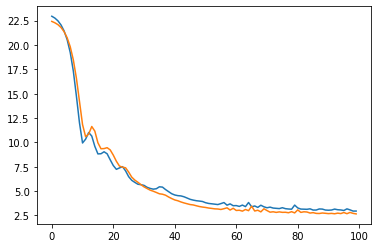

2.9367856979370117

In [47]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()

np.amin(history.history["val_loss"])

In [92]:
# PREDIKSI HARGA RUMAH

fitur_x = dataset.loc[:,column_sels]
fitur_x = pd.DataFrame(data=min_max_scaler.fit_transform(fitur_x), columns=column_sels)

model.predict(fitur_x.values)

array([[30.386234 ],
       [24.862707 ],
       [33.858707 ],
       [32.20039  ],
       [32.04496  ],
       [26.141703 ],
       [21.539473 ],
       [20.224205 ],
       [14.541312 ],
       [19.408257 ],
       [21.07565  ],
       [20.925272 ],
       [19.57238  ],
       [20.177237 ],
       [19.567705 ],
       [19.756693 ],
       [22.200216 ],
       [17.486547 ],
       [17.939234 ],
       [17.816885 ],
       [14.600943 ],
       [17.71087  ],
       [17.26605  ],
       [15.599303 ],
       [16.649153 ],
       [15.508061 ],
       [16.64671  ],
       [16.999079 ],
       [20.513063 ],
       [21.981441 ],
       [14.80523  ],
       [18.553135 ],
       [15.136031 ],
       [15.564353 ],
       [16.825138 ],
       [20.175276 ],
       [19.235046 ],
       [20.938864 ],
       [21.864292 ],
       [29.451797 ],
       [34.655064 ],
       [32.153088 ],
       [26.64776  ],
       [26.308933 ],
       [22.864054 ],
       [20.523008 ],
       [20.102407 ],
       [19.12

In [96]:
perbandingan = pd.DataFrame()
perbandingan["Data"] = dataset["medv"]
perbandingan["Prediksi"] = model.predict(fitur_x.values)

In [97]:
perbandingan

,Data,Prediksi
0,24.0,30.386234
1,21.6,24.862707
2,34.7,33.858707
3,33.4,32.200390
4,36.2,32.044960
...,...,...
501,22.4,23.991520
502,20.6,21.391573
503,23.9,27.234438
504,22.0,25.762215
